In [1]:
install.packages('ResourceSelection')


The downloaded binary packages are in
	/var/folders/4s/4fl5fhhj7zx8nldtwhmr3ls80000gn/T//RtmpdHaCDr/downloaded_packages


In [2]:
library(ResourceSelection)

ResourceSelection 0.3-5 	 2019-07-22



In [3]:
install.packages('dplyr')


The downloaded binary packages are in
	/var/folders/4s/4fl5fhhj7zx8nldtwhmr3ls80000gn/T//RtmpdHaCDr/downloaded_packages


In [4]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [5]:
install.packages('corrplot')


The downloaded binary packages are in
	/var/folders/4s/4fl5fhhj7zx8nldtwhmr3ls80000gn/T//RtmpdHaCDr/downloaded_packages


In [6]:
library(corrplot)

corrplot 0.92 loaded



In [7]:
install.packages('caret')


The downloaded binary packages are in
	/var/folders/4s/4fl5fhhj7zx8nldtwhmr3ls80000gn/T//RtmpdHaCDr/downloaded_packages


In [8]:
library(caret)

Loading required package: ggplot2

Loading required package: lattice



In [9]:
install.packages('DescTools')


The downloaded binary packages are in
	/var/folders/4s/4fl5fhhj7zx8nldtwhmr3ls80000gn/T//RtmpdHaCDr/downloaded_packages


In [10]:
install.packages('car')


The downloaded binary packages are in
	/var/folders/4s/4fl5fhhj7zx8nldtwhmr3ls80000gn/T//RtmpdHaCDr/downloaded_packages


In [11]:
library(car)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




In [12]:
histogram <- function(x) 
{
  title <- paste(deparse(substitute(x), 500), collapse="\n") 
  sdx <- sd(x)
  mx <- mean(x)
  hist(x, prob=TRUE,
       main=paste("Histogram of ",title),
       xlim=c(mx-3*sdx, mx+3*sdx), ylim=c(0, 0.5/sdx)) 
    curve(dnorm(x, mean=mx, sd=sdx), col='red', lwd=3, add=TRUE)
}

In [13]:
library(DescTools)


Attaching package: ‘DescTools’


The following object is masked from ‘package:car’:

    Recode


The following objects are masked from ‘package:caret’:

    MAE, RMSE




In [14]:
Diabetes <- read.csv("Diabetes Dataset.csv")

In [15]:
head(Diabetes)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
,<int>,<int>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24,N
4,634,34224,F,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21,N
5,721,34225,F,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24,N
6,759,34230,F,32,3.6,28,4.0,3.8,2.0,2.4,3.8,1.0,24,N


In [16]:
nrow(Diabetes)

[1] 1000

In [17]:
is.null(Diabetes)

[1] FALSE

In [18]:
# Remove rows with CLASS = 'P'
Diabetes <- Diabetes[Diabetes$CLASS != 'P',]

In [19]:
# Diabetes$Gender <- as.factor(Diabetes$Gender)

In [20]:
# Diabetes$CLASS <- as.factor(Diabetes$CLASS)

In [21]:
summary(Diabetes)

       ID          No_Pation           Gender               AGE      
 Min.   :  1.0   Min.   :     123   Length:947         Min.   :20.0  
 1st Qu.:125.0   1st Qu.:   24064   Class :character   1st Qu.:51.0  
 Median :295.0   Median :   34390   Mode  :character   Median :55.0  
 Mean   :337.4   Mean   :  282095                      Mean   :54.1  
 3rd Qu.:546.5   3rd Qu.:   45370                      3rd Qu.:59.0  
 Max.   :800.0   Max.   :75435657                      Max.   :79.0  
      Urea              Cr            HbA1c             Chol       
 Min.   : 0.500   Min.   :  6.0   Min.   : 0.900   Min.   : 0.000  
 1st Qu.: 3.700   1st Qu.: 48.0   1st Qu.: 6.800   1st Qu.: 4.000  
 Median : 4.600   Median : 60.0   Median : 8.100   Median : 4.800  
 Mean   : 5.159   Mean   : 69.1   Mean   : 8.409   Mean   : 4.879  
 3rd Qu.: 5.700   3rd Qu.: 73.0   3rd Qu.:10.200   3rd Qu.: 5.600  
 Max.   :38.900   Max.   :800.0   Max.   :16.000   Max.   :10.300  
       TG              HDL        

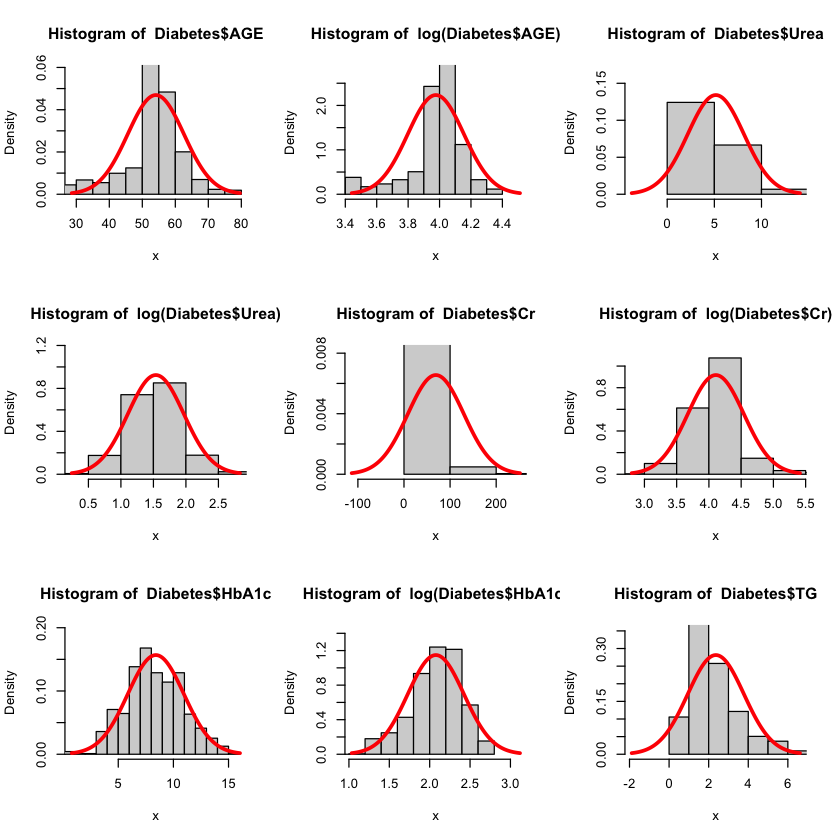

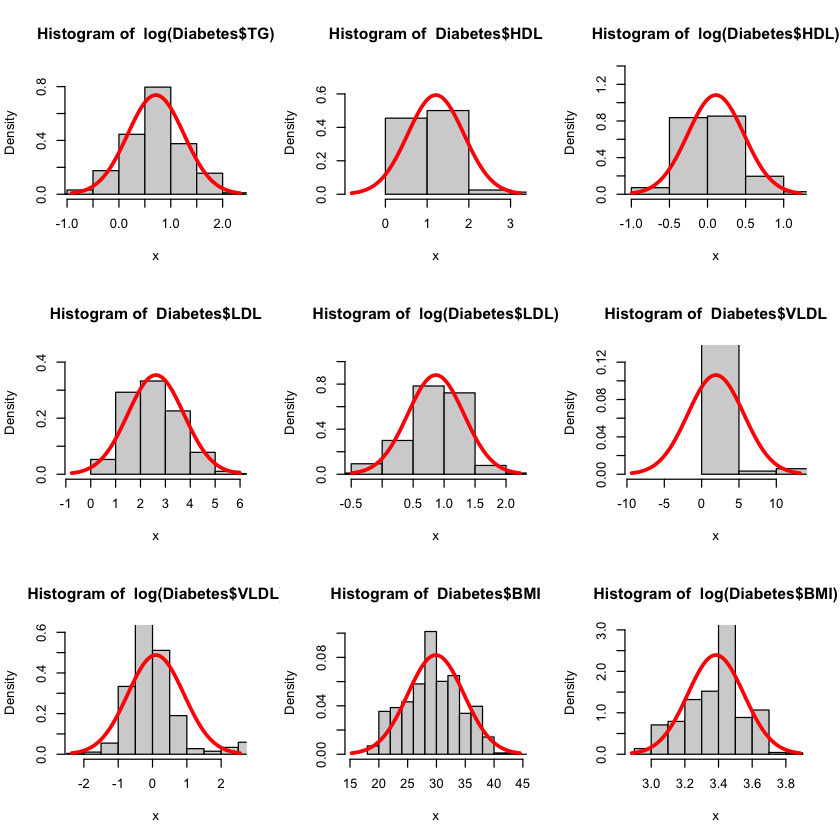

In [22]:
par(mfrow=c(3,3)) 
histogram(Diabetes$AGE)
histogram(log(Diabetes$AGE))
histogram(Diabetes$Urea) 
histogram(log(Diabetes$Urea)) 
histogram(Diabetes$Cr) 
histogram(log(Diabetes$Cr)) 
histogram(Diabetes$HbA1c) 
histogram(log(Diabetes$HbA1c)) 
histogram(Diabetes$TG)
histogram(log(Diabetes$TG))
histogram(Diabetes$HDL)
histogram(log(Diabetes$HDL))
histogram(Diabetes$LDL)
histogram(log(Diabetes$LDL))
histogram(Diabetes$VLDL)
histogram(log(Diabetes$VLDL))
histogram(Diabetes$BMI)
histogram(log(Diabetes$BMI))

In [23]:
# Split the dataset into training and test sets
set.seed(123)
trainIndex <- createDataPartition(Diabetes$CLASS, p = 0.7, list = FALSE)
train_data <- Diabetes[trainIndex, ]
test_data <- Diabetes[-trainIndex, ]

In [24]:
head(train_data)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
,<int>,<int>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
4,634,34224,F,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21,N
5,721,34225,F,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24,N
6,759,34230,F,32,3.6,28,4.0,3.8,2.0,2.4,3.8,1.0,24,N
7,636,34231,F,31,4.4,55,4.2,3.6,0.7,1.7,1.6,0.3,23,N
8,788,34232,F,33,3.3,53,4.0,4.0,1.1,0.9,2.7,1.0,21,N
9,82,46815,F,30,3.0,42,4.1,4.9,1.3,1.2,3.2,0.5,22,N


In [25]:
head(test_data)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
,<int>,<int>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24,N
10,132,34234,F,45,4.6,54,5.1,4.2,1.7,1.2,2.2,0.8,23,N
11,402,34235,F,50,3.5,39,4.0,4.0,1.5,1.2,2.2,0.7,24,N
19,458,34242,F,39,3.2,55,5.0,4.6,1.3,1.0,3.0,0.6,21,N


In [26]:
wd <- subset(test_data, select = -CLASS)

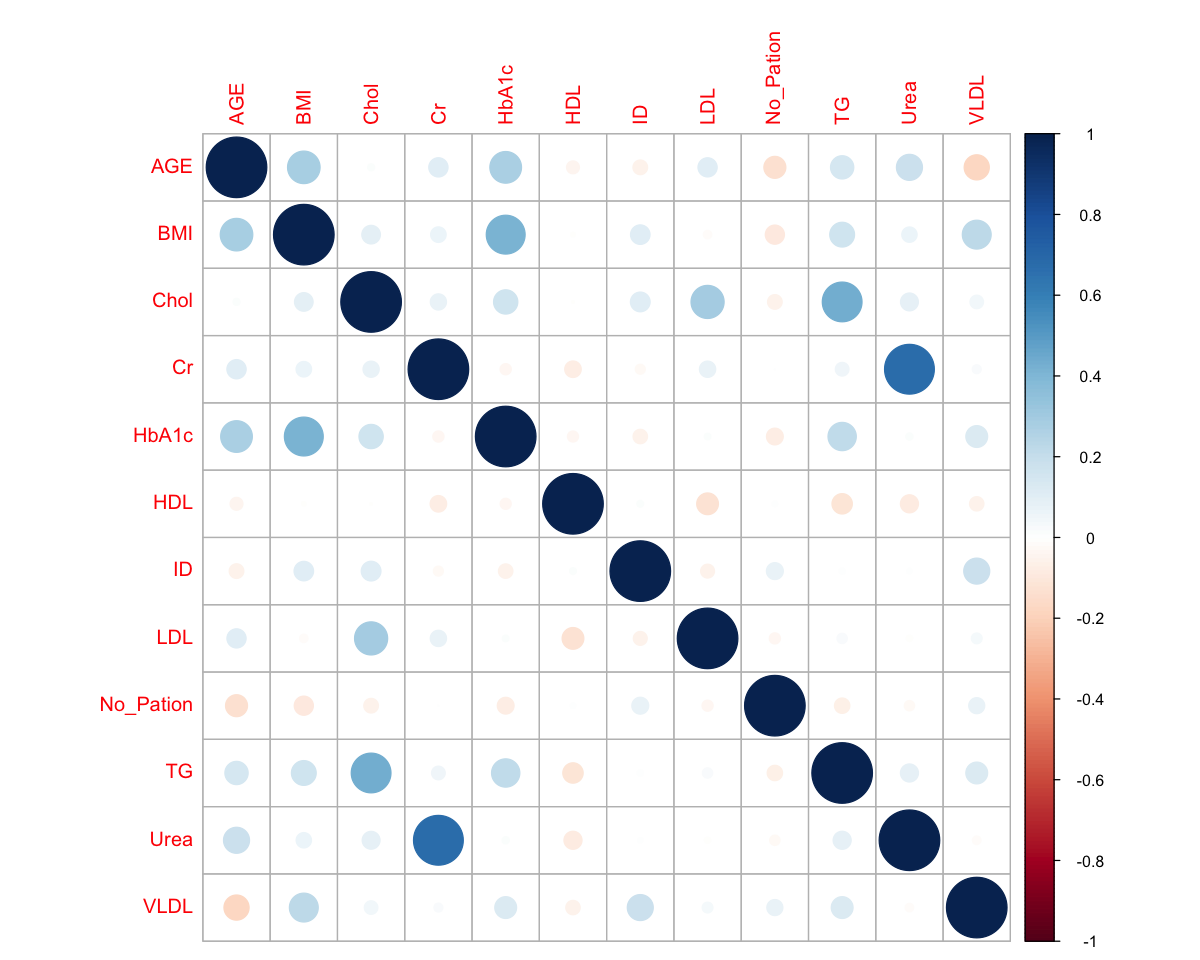

In [27]:
wd_num <- select_if(wd, is.numeric)
options(repr.plot.width=10, repr.plot.height=8) 
corrplot(cor(wd_num), order = "alphabet", tl.srt = 90)
options(repr.plot.width=5, repr.plot.height=5)

# Logistic Regression

In [28]:
train_data$CLASS <- ifelse(train_data$CLASS == "Y", 1, 0)

In [29]:
lrm <- glm(CLASS ~ AGE + Urea + Cr + Chol + HbA1c + TG + HDL + LDL + VLDL + BMI, data = train_data, family = "binomial")
summary(lrm)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = CLASS ~ AGE + Urea + Cr + Chol + HbA1c + TG + HDL + 
    LDL + VLDL + BMI, family = "binomial", data = train_data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.04352   0.00028   0.00274   0.01677   2.28209  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -33.219562   5.739724  -5.788 7.14e-09 ***
AGE           0.044183   0.036827   1.200  0.23024    
Urea         -0.013397   0.147998  -0.091  0.92787    
Cr            0.005992   0.014801   0.405  0.68560    
Chol          0.792119   0.277831   2.851  0.00436 ** 
HbA1c         1.351565   0.290719   4.649 3.33e-06 ***
TG            0.691984   0.303424   2.281  0.02257 *  
HDL           0.408566   0.842797   0.485  0.62784    
LDL           0.032206   0.328973   0.098  0.92201    
VLDL          0.133572   0.172918   0.772  0.43984    
BMI           0.771395   0.159008   4.851 1.23e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 

In [30]:
actual <- test_data$CLASS
predicted <- round(1-fitted(lrm))[1:length(actual)] 
xt <- xtabs(~ actual + predicted)
xt

      predicted
actual   0   1
     N   2  28
     Y 212  41

In [31]:
accuracy <- (xt[1,1]+xt[2,2])/sum(xt) 
round(accuracy,3)

[1] 0.152

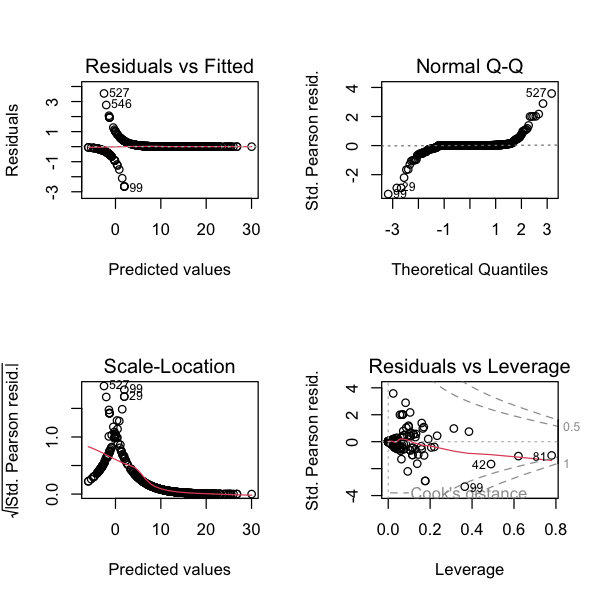

In [32]:
par(mfrow=c(2,2)) 
plot(lrm)

In [33]:
names(lrm)

[1] "coefficients"      "residuals"         "fitted.values"    
 [4] "effects"           "R"                 "rank"             
 [7] "qr"                "family"            "linear.predictors"
[10] "deviance"          "aic"               "null.deviance"    
[13] "iter"              "weights"           "prior.weights"    
[16] "df.residual"       "df.null"           "y"                
[19] "converged"         "boundary"          "model"            
[22] "call"              "formula"           "terms"            
[25] "data"              "offset"            "control"          
[28] "method"            "contrasts"         "xlevels"

In [34]:
coef(lrm)

(Intercept)           AGE          Urea            Cr          Chol 
-33.219561808   0.044183010  -0.013396993   0.005992009   0.792119007 
        HbA1c            TG           HDL           LDL          VLDL 
  1.351565044   0.691984111   0.408565658   0.032205622   0.133572207 
          BMI 
  0.771395020

In [35]:
exp(coef(lrm))

(Intercept)          AGE         Urea           Cr         Chol        HbA1c 
3.740482e-15 1.045174e+00 9.866923e-01 1.006010e+00 2.208070e+00 3.863467e+00 
          TG          HDL          LDL         VLDL          BMI 
1.997675e+00 1.504658e+00 1.032730e+00 1.142904e+00 2.162781e+00

In [36]:
PseudoR2(lrm, which='all')

McFadden     McFaddenAdj        CoxSnell      Nagelkerke   AldrichNelson 
      0.8215991       0.7737735       0.4340142       0.8683485       0.3627271 
VeallZimmermann           Efron McKelveyZavoina            Tjur             AIC 
      0.8863099       0.7972869       0.9336229       0.8034694     104.0653425 
            BIC          logLik         logLik0              G2 
    153.5464461     -41.0326712    -230.0025418     377.9397410

In [37]:
hoslem.test(train_data$CLASS, fitted(lrm))


	Hosmer and Lemeshow goodness of fit (GOF) test

data:  train_data$CLASS, fitted(lrm)
X-squared = 0.31595, df = 8, p-value = 1


In [38]:
lrm1 <- glm(CLASS ~ Chol + HbA1c + TG + BMI, data = train_data, family = "binomial")
summary(lrm1)


Call:
glm(formula = CLASS ~ Chol + HbA1c + TG + BMI, family = "binomial", 
    data = train_data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.02458   0.00040   0.00336   0.02012   2.29758  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -30.5307     4.7256  -6.461 1.04e-10 ***
Chol          0.7590     0.2265   3.351 0.000806 ***
HbA1c         1.3914     0.2683   5.187 2.14e-07 ***
TG            0.6782     0.2693   2.519 0.011779 *  
BMI           0.7822     0.1468   5.330 9.83e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 460.005  on 663  degrees of freedom
Residual deviance:  84.338  on 659  degrees of freedom
AIC: 94.338

Number of Fisher Scoring iterations: 10


In [39]:
actual1 <- test_data$CLASS
predicted1 <- round(1-fitted(lrm1))[1:length(actual1)] 
xt1 <- xtabs(~ actual1 + predicted1)
xt1

       predicted1
actual1   0   1
      N   2  28
      Y 213  40

In [40]:
accuracy1 <- (xt[1,1]+xt[2,2])/sum(xt) 
round(accuracy1,3)

[1] 0.152

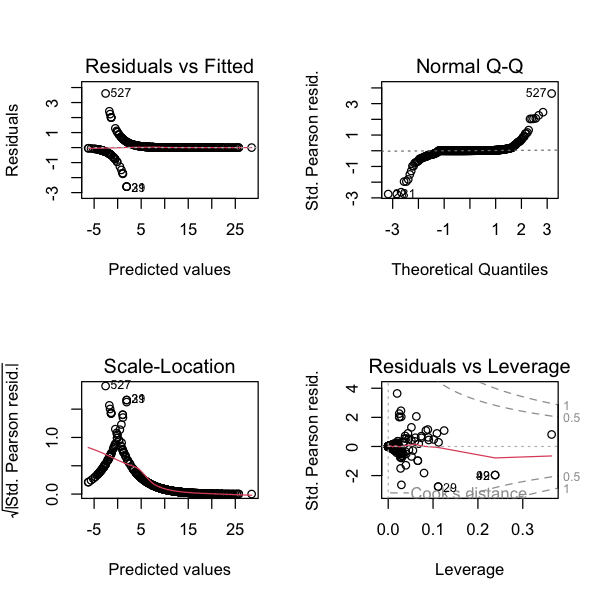

In [41]:
par(mfrow=c(2,2)) 
plot(lrm1)

In [42]:
names(lrm1)

[1] "coefficients"      "residuals"         "fitted.values"    
 [4] "effects"           "R"                 "rank"             
 [7] "qr"                "family"            "linear.predictors"
[10] "deviance"          "aic"               "null.deviance"    
[13] "iter"              "weights"           "prior.weights"    
[16] "df.residual"       "df.null"           "y"                
[19] "converged"         "boundary"          "model"            
[22] "call"              "formula"           "terms"            
[25] "data"              "offset"            "control"          
[28] "method"            "contrasts"         "xlevels"

In [43]:
round(min(vif(lrm)))

[1] 1

In [44]:
round(min(vif(lrm1)))

[1] 1

In [45]:
summary(lrm1)


Call:
glm(formula = CLASS ~ Chol + HbA1c + TG + BMI, family = "binomial", 
    data = train_data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.02458   0.00040   0.00336   0.02012   2.29758  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -30.5307     4.7256  -6.461 1.04e-10 ***
Chol          0.7590     0.2265   3.351 0.000806 ***
HbA1c         1.3914     0.2683   5.187 2.14e-07 ***
TG            0.6782     0.2693   2.519 0.011779 *  
BMI           0.7822     0.1468   5.330 9.83e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 460.005  on 663  degrees of freedom
Residual deviance:  84.338  on 659  degrees of freedom
AIC: 94.338

Number of Fisher Scoring iterations: 10


In [46]:
coef(lrm1)

(Intercept)        Chol       HbA1c          TG         BMI 
-30.5307256   0.7590277   1.3913676   0.6782447   0.7821909

In [47]:
exp(coef(lrm1))

(Intercept)         Chol        HbA1c           TG          BMI 
5.503948e-14 2.136198e+00 4.020345e+00 1.970416e+00 2.186257e+00

In [48]:
PseudoR2(lrm1, which='all')

McFadden     McFaddenAdj        CoxSnell      Nagelkerke   AldrichNelson 
      0.8166583       0.7949194       0.4320736       0.8644658       0.3613339 
VeallZimmermann           Efron McKelveyZavoina            Tjur             AIC 
      0.8829059       0.7906734       0.9296491       0.7986370      94.3381167 
            BIC          logLik         logLik0              G2 
    116.8295275     -42.1690584    -230.0025418     375.6669668

In [49]:
hoslem.test(train_data$CLASS, fitted(lrm1))


	Hosmer and Lemeshow goodness of fit (GOF) test

data:  train_data$CLASS, fitted(lrm1)
X-squared = 0.47278, df = 8, p-value = 0.9999


# Testing the Final model on Class "P" and Probability

In [50]:
train_data$CLASS <- ifelse(train_data$CLASS == 1, "Y", "N")

In [51]:
train_data$CLASS <- "P"

In [52]:
prediabetic_data <- Diabetes[train_data$CLASS == "P",]
prediabetic_prob <- predict(lrm1, newdata = prediabetic_data, type = "response")

In [53]:
mean_prob_diabetic <- mean(prediabetic_prob)
mean_prob_diabetic

[1] 0.8908305

In [54]:
mean_prob_diabetic <- mean(prediabetic_prob) * 100
mean_prob_diabetic

[1] 89.08305